<a href="https://colab.research.google.com/github/Ravindrakumarnayak/Machine_learning/blob/main/multi_regression_model_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [107]:
import statsmodels.formula.api as smf


In [108]:
cars=pd.read_csv("/content/Cars.csv")
cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [109]:
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [110]:
cars.tail()

,HP,MPG,VOL,SP,WT
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099
80,236,12.101263,107,139.840817,34.948615


In [111]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [112]:
cars.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [113]:
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [114]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


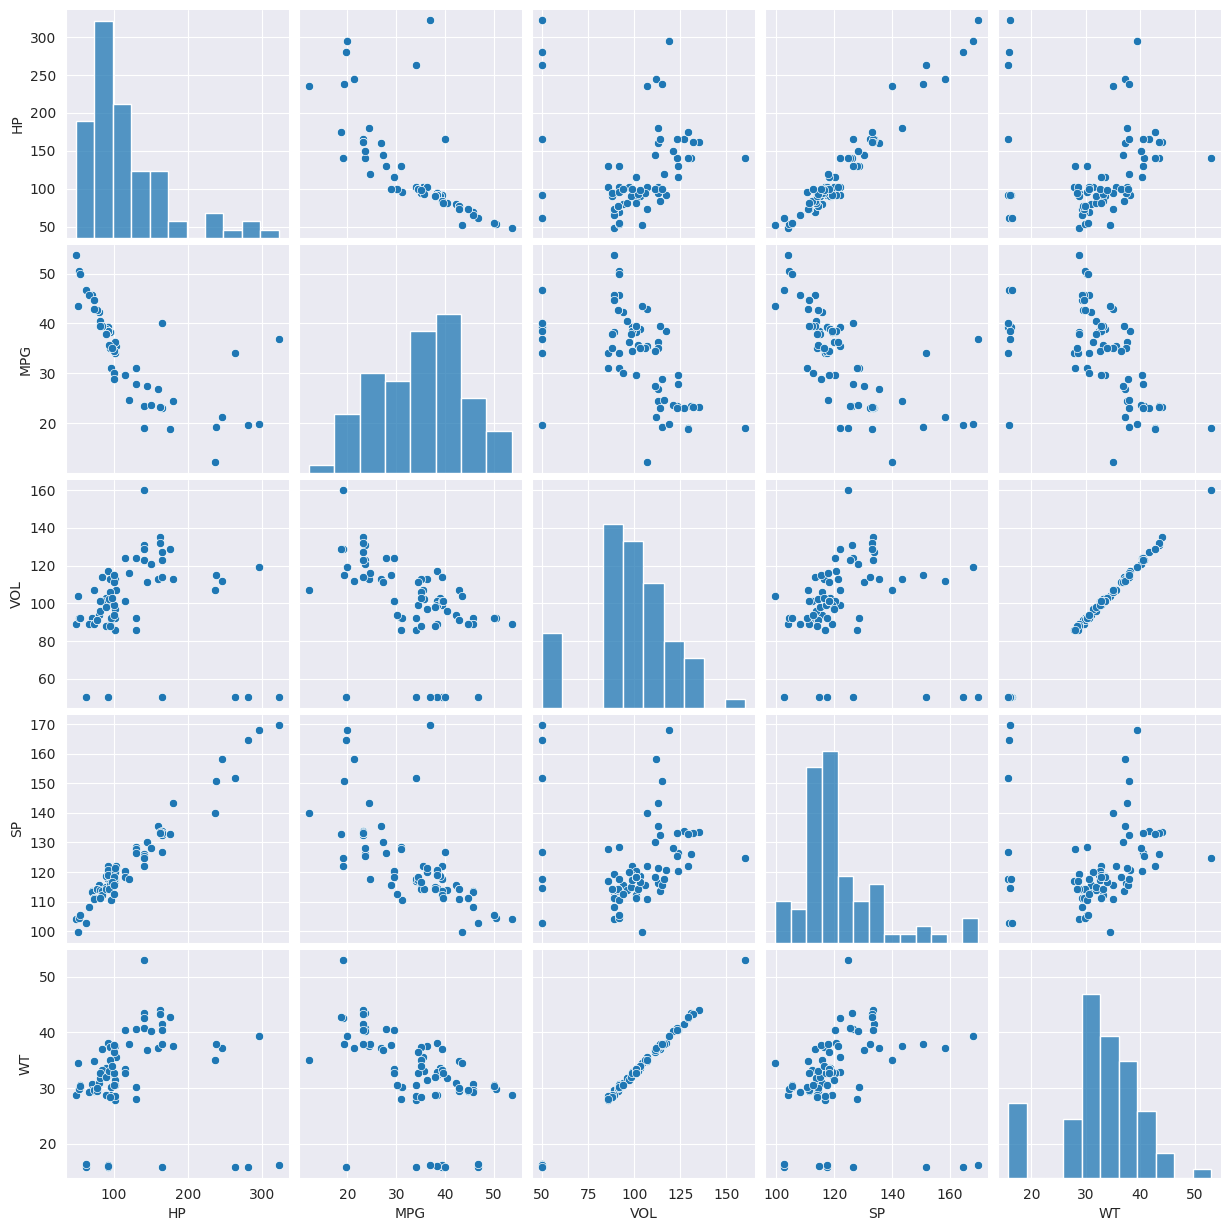

In [115]:
sns.set_style(style='darkgrid')
sns.pairplot(cars)

In [116]:
model=smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [117]:
model

In [118]:
model.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [119]:
print('*****tvalues********','\n',model.tvalues,'*******pvalues******','\n',model.pvalues)

*****tvalues******** 
 Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 *******pvalues****** 
 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [120]:
model.rsquared,model.rsquared_adj

(0.7705372737359842, 0.7584602881431413)

In [121]:
model_volume=smf.ols('MPG~VOL',data=cars).fit()

In [122]:
model_volume

In [123]:
model_volume.pvalues

Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64

In [124]:
model_volume.tvalues

Intercept    14.106056
VOL          -5.541400
dtype: float64

In [125]:
model_WT=smf.ols('MPG~WT',data=cars).fit()

In [126]:
model_WT

In [127]:
model_WT.pvalues

Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64

In [128]:
model_WT.tvalues

Intercept    14.248923
WT           -5.508067
dtype: float64

In [129]:
model_WT_VOL=smf.ols('MPG~WT+VOL',data=cars).fit()

In [130]:
model_WT_VOL.pvalues #problem of collinearity occurs as pvalue is greater than alpha=0.05,on combining both of them )

Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64

In [131]:
rsq_hp=smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared
vif_hp=1/(1-rsq_hp)

In [132]:
rsq_wt=smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared
vif_wt=1/(1-rsq_wt)

In [133]:
rsq_sp=smf.ols('SP~HP+VOL+WT',data=cars).fit().rsquared
vif_sp=1/(1-rsq_sp)

In [134]:
rsq_vol=smf.ols('VOL~HP+WT+SP',data=cars).fit().rsquared
vif_vol=1/(1-rsq_vol)

In [135]:
d1={'Variables':['HP',"WT",'VOL','SP'], 'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame=pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,HP,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


In [136]:
model=smf.ols('MPG~HP+WT+SP',data=cars).fit()
print(model.rsquared,model.aic)

0.7694828139983461 476.2992750152976


In [137]:
model=smf.ols('MPG~HP+VOL+SP',data=cars).fit()
print(model.rsquared,model.aic)

0.770368341321302 475.9875158854609


In [149]:
model=smf.ols('MPG~HP+WT+SP',data=cars).fit()
qqplot=sm.qqplot(model.resid,line='q')
plt.show()

AttributeError: ignored

In [148]:
def get_standardized_value(vals):
  return(vals-vals.mean())/vals.std()


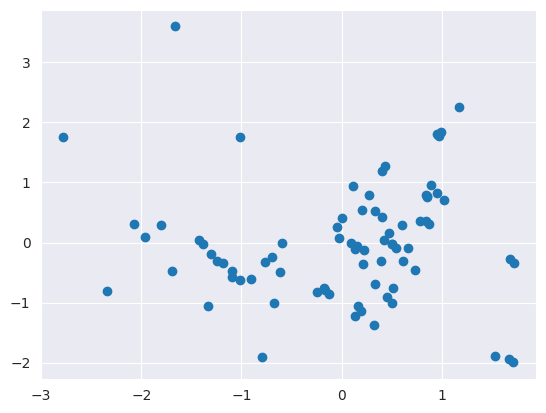

In [147]:
plt.scatter(get_standardized_value(model.fittedvalues),
                                   get_standardized_value(model.resid))

In [146]:
fig=plt.figure(figsize=(15,10))
import statsmodels.formula.api as smf
fig=sm.graphics.plot_regress_exog(model,'vol',fig=fig)
fig

AttributeError: ignored

<Figure size 1500x1000 with 0 Axes>

In [145]:
fig=plt.figure(figsize=(15,10))
import statsmodels.formula.api as smf
fig=sm.graphics.plot_regress_exog(model,'HP',fig=fig)
fig

AttributeError: ignored

<Figure size 1500x1000 with 0 Axes>

In [144]:
fig=plt.figure(figsize=(15,10))
import statsmodels.formula.api as smf
fig=sm.graphics.plot_regress_exog(model,'SP',fig=fig)
fig

AttributeError: ignored

<Figure size 1500x1000 with 0 Axes>

In [142]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

<StemContainer object of 3 artists>

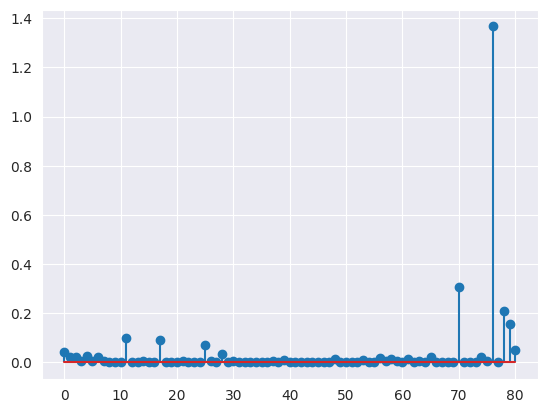

In [143]:
plt.stem(np.arange(len(cars)),np.round(c,3))

In [151]:
np.argmax(c),np.max(c)

(76, 1.366455137156618)

In [152]:
cars.shape

(81, 5)

In [153]:
cars.shape[1]

5

In [156]:
k=cars.shape[1]
n=cars.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff


0.2222222222222222

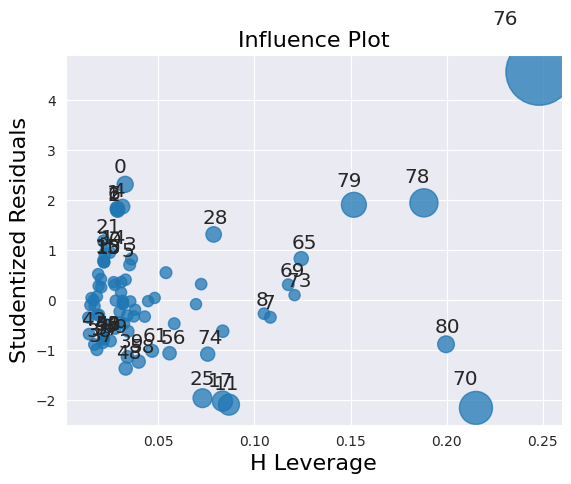

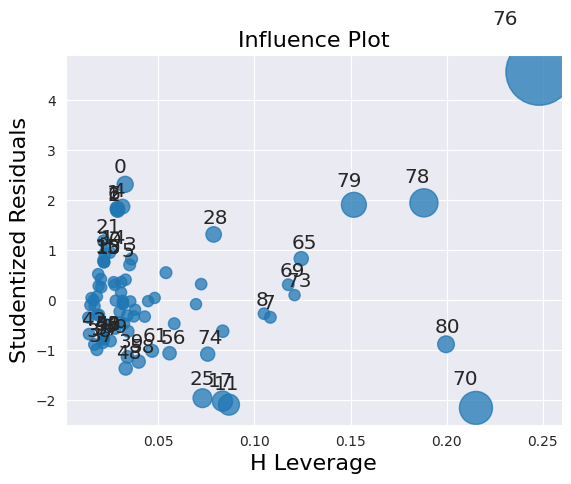

In [157]:
influence_plot(model,alpha=0.5)

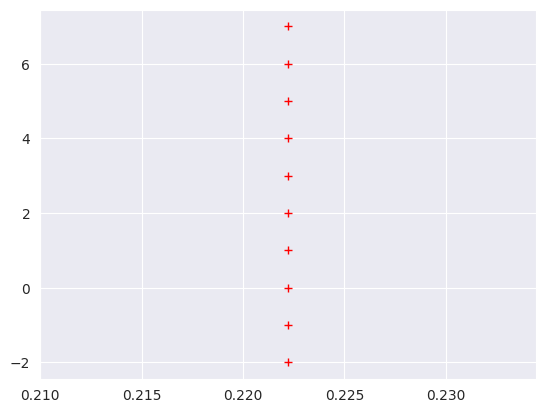

In [158]:
y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

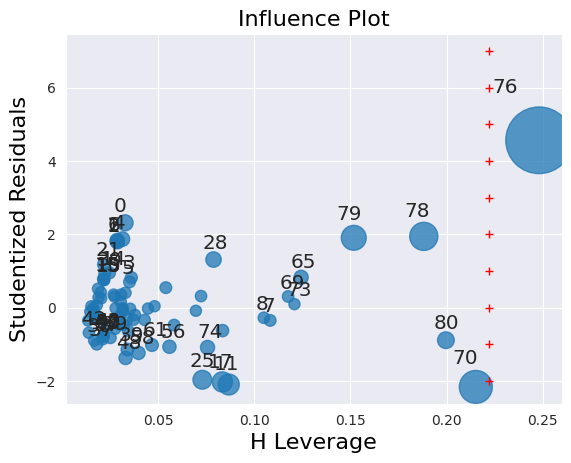

In [159]:
influence_plot(model,alpha=0.5)
y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')